## In this ML model, we will compare the GDP per capita and Life Satisfaction per country

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 
import numpy as np
%matplotlib inline

In [2]:
gdp = pd.read_csv('gdp_per_capita.csv')
oecd = pd.read_csv('oecd_bli.csv')

In [3]:
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.38",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.14",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.32",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.30",2011.0


In [4]:
oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [5]:
oecd= oecd.loc[oecd['Indicator'] == 'Life satisfaction']

oecd.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1813,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
1814,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN


In [6]:
oecd.rename(columns ={'Value':'Life satisfaction'}, inplace=True)
oecd.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Life satisfaction,Flag Codes,Flags
1813,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
1814,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
1815,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
1816,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.4,NaN,NaN
1817,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.7,NaN,NaN


In [7]:
oecd= oecd[['Country', 'Life satisfaction']]

In [8]:
gdp.rename(columns ={'2015':'GDP Per Capita'}, inplace=True)
gdp.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP Per Capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.38",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.14",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.32",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.30",2011.0


In [9]:
df = pd.merge(gdp, oecd, on='Country')
df = df[['Country', 'GDP Per Capita', 'Life satisfaction']]
df = df.groupby(['Country', 'GDP Per Capita'], as_index=False)['Life satisfaction'].mean()
df.head()

,Country,GDP Per Capita,Life satisfaction
0,Australia,"50,961.87",7.350
1,Austria,"43,724.03",7.225
2,Belgium,"40,106.63",7.000
3,Brazil,"8,670.00",6.400
4,Canada,"43,331.96",7.425


In [10]:
df2 = df.copy()
df2.head()

,Country,GDP Per Capita,Life satisfaction
0,Australia,"50,961.87",7.350
1,Austria,"43,724.03",7.225
2,Belgium,"40,106.63",7.000
3,Brazil,"8,670.00",6.400
4,Canada,"43,331.96",7.425


In [11]:
df2.sort_values(by=['Country'], inplace=True, ascending = True)

In [12]:
df2.head()

,Country,GDP Per Capita,Life satisfaction
0,Australia,"50,961.87",7.350
1,Austria,"43,724.03",7.225
2,Belgium,"40,106.63",7.000
3,Brazil,"8,670.00",6.400
4,Canada,"43,331.96",7.425


In [13]:
print(df2.dtypes)

Country               object
GDP Per Capita        object
Life satisfaction    float64
dtype: object


In [14]:
def convert_to_num(x):
    x = x.split(',')
    separator = ''
    num = float(separator.join(x))
    return num

In [15]:
print(convert_to_num('59,961.87'))

59961.87


In [16]:
df2['GDP Per Capita']= df2['GDP Per Capita'].apply(lambda x: convert_to_num(x))

In [17]:
print(df2.dtypes)

Country               object
GDP Per Capita       float64
Life satisfaction    float64
dtype: object


In [18]:
df2.head()

,Country,GDP Per Capita,Life satisfaction
0,Australia,50961.87,7.350
1,Austria,43724.03,7.225
2,Belgium,40106.63,7.000
3,Brazil,8670.00,6.400
4,Canada,43331.96,7.425


In [19]:
df = df2.copy()
df.head()

,Country,GDP Per Capita,Life satisfaction
0,Australia,50961.87,7.350
1,Austria,43724.03,7.225
2,Belgium,40106.63,7.000
3,Brazil,8670.00,6.400
4,Canada,43331.96,7.425


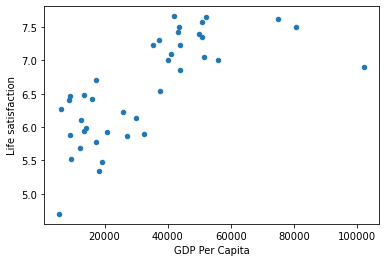

In [20]:
df.plot(kind='scatter', x='GDP Per Capita', y='Life satisfaction')
plt.show()

In [21]:
model = linear_model.LinearRegression()
X = np.c_[df['GDP Per Capita']]
y = np.c_[df['Life satisfaction']]

model.fit(X,y)
pred = model.predict(X)
print('The Linear coefficient is', model.coef_)
print('The Intercept is', model.intercept_)


The Linear coefficient is [[2.49678697e-05]]
The Intercept is [5.75717843]


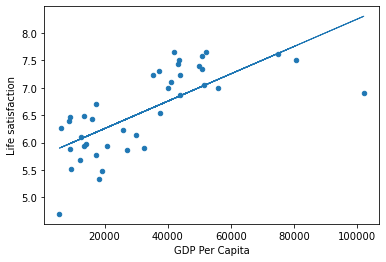

In [22]:
df.plot(kind='scatter', x='GDP Per Capita', y='Life satisfaction')
plt.plot(X, pred, linewidth=1)
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
# MSE
print('Mean squared error: %.2f'% mean_squared_error(y, pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y, pred))

Mean squared error: 0.27
Coefficient of determination: 0.52


From this analysis we can see that there is a corellation between Life Satisfaction and the GDP Per capita. Although the r2 Score is 0.52 which is nearly accuracte half the time, we can see that the mean squared error is not high which means the model is can predict the line satisfaction a person depending on his GDP Per Capita with an accuracy of 27%